In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm

import os
import cv2
import random
import pickle

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


# Generate & Pickle Dataset (RUN)

In [16]:
data_path_forest = '/home/lynakim/cs325b/data/ImagesGoogleMapsForests'
data_path_orchard = '/home/lynakim/cs325b/data/ImagesGoogleMapsOrchards'

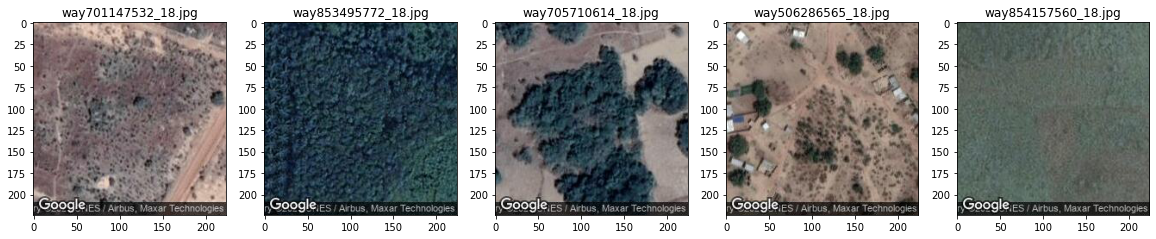

In [17]:
# Show sample forest images 
plt.figure(figsize=(20,20))
img_folder = data_path_forest
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [18]:
IMG_WIDTH=200
IMG_HEIGHT=200

In [19]:
# Make dataset of images in dir
def create_dataset():
    paths = [data_path_forest, data_path_orchard]
    
    img_data_array=[]
    class_name=[]
    
    for data_path in paths:
        for file in tqdm(os.listdir(data_path)):
                         
            image_path = os.path.join(data_path, file)
            image = cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            if image is None:
                print('Wrong path:', data_path)
            else:
                image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
                image=np.array(image)
                image = image.astype('float32')
                image /= 255 
                img_data_array.append(image)
                class_name.append(data_path)
    return img_data_array, class_name

# extract the image array and class name
img_data, class_name = create_dataset()

100%|██████████| 1886/1886 [00:17<00:00, 106.60it/s]


In [20]:
# Create labels out of image directories
target_dict = {k: v for v, k in enumerate(np.unique(class_name))}
y =  [target_dict[class_name[i]] for i in range(len(class_name))]

In [21]:
# Create train & test sets
X_train, X_test, y_train, y_test = train_test_split(img_data, y, test_size=0.3)

In [22]:
# Reshape train & test images
X_train = np.array(X_train).reshape((len(X_train), IMG_HEIGHT*IMG_WIDTH*3))
X_test = np.array(X_test).reshape((len(X_test), IMG_HEIGHT*IMG_WIDTH*3))

# Generate & Pickle Model (DO NOT RUN)

In [23]:
# Create, fit, & predict RF model
clf = RandomForestClassifier(n_estimators=100, verbose=1)
clf.fit(X_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.4min finished


RandomForestClassifier(verbose=1)

In [14]:
# Pickle model
pickle.dump(clf, open('initial_rf', 'wb'))

# Load & Evaluate model (RUN)

In [8]:
# clf = pickle.load(open('initial_rf', 'rb'))

In [24]:
# Run model
y_pred = clf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [25]:
# Evaluate RF 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 Macro:", np.mean(metrics.f1_score(y_test, y_pred, average=None)))

Accuracy: 0.6713286713286714
F1 Macro: 0.6640057916308959


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


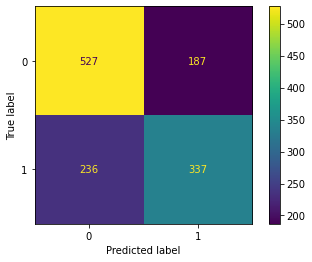

In [26]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()


In [14]:
target_dict

{'/home/lynakim/cs325b/data/ImagesGoogleMapsForests': 0,
 '/home/lynakim/cs325b/data/ImagesGoogleMapsOrchards': 1}